In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
# Read CSV
city_df = pd.read_csv("city_data.csv")
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [32]:
ride_df = pd.read_csv("ride_data.csv")
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [33]:
pyber_df = pd.merge(city_df, ride_df, on='city')
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [34]:
driver_count_by_city=pyber_df[['city','driver_count','type']].drop_duplicates()
driver_count_by_city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
28,Nguyenbury,8,Urban
54,East Douglas,12,Urban
76,West Dawnfurt,34,Urban
105,Rodriguezburgh,52,Urban


In [35]:
avg_fare_per_city_df = ride_df.groupby(['city'],as_index=False)['fare'].mean()
avg_fare_per_city_df = avg_fare_per_city_df.rename(columns={'fare':'average fare'})
avg_fare_per_city_df.head()

,city,average fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [36]:
total_ride_per_city_df = ride_df.groupby(['city'],as_index=False)['ride_id'].count()
total_ride_per_city_df = total_ride_per_city_df.rename(columns={'ride_id':'total rides'})
total_ride_per_city_df.head()

,city,total rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [37]:
summary_1= pd.merge(driver_count_by_city, avg_fare_per_city_df, on='city')
summary_1.head()

,city,driver_count,type,average fare
0,Kelseyland,63,Urban,21.806429
1,Nguyenbury,8,Urban,25.899615
2,East Douglas,12,Urban,26.169091
3,West Dawnfurt,34,Urban,22.330345
4,Rodriguezburgh,52,Urban,21.332609


In [38]:
summary_df = pd.merge(summary_1, total_ride_per_city_df, on='city')
summary_df.head()

,city,driver_count,type,average fare,total rides
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


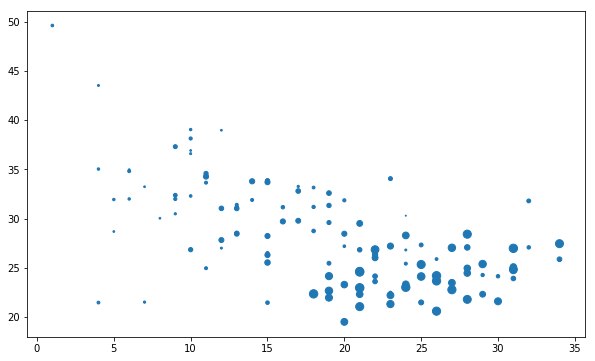

In [39]:
plt.scatter(summary_df['total rides'],summary_df['average fare'],s=summary_df['driver_count'])
plt.show()

In [40]:
urban_df = summary_df.loc[summary_df['type']=='Urban']
urban_df.head()                         

,city,driver_count,type,average fare,total rides
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


In [41]:
suburban_df = summary_df.loc[summary_df['type']=='Suburban']
suburban_df.head()

,city,driver_count,type,average fare,total rides
66,Carrollbury,4,Suburban,36.606000,10
67,Williamchester,26,Suburban,34.278182,11
68,New Michelleberg,9,Suburban,24.971818,11
69,West Evan,4,Suburban,27.013333,12
70,South Gracechester,19,Suburban,31.345789,19


In [42]:
rural_df = summary_df.loc[summary_df['type']=='Rural']
rural_df.head()

,city,driver_count,type,average fare,total rides
108,South Elizabethmouth,3,Rural,28.698000,5
109,East Troybury,3,Rural,33.244286,7
110,Kinghaven,3,Rural,34.980000,6
111,New Johnbury,6,Rural,35.042500,4
112,Erikport,3,Rural,30.043750,8


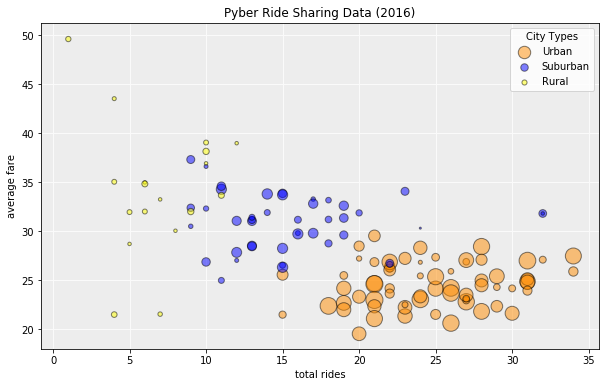

In [43]:
#plt.figure(figsize=(12,6))



ax = urban_df.plot.scatter(x='total rides', y='average fare', s=urban_df['driver_count']*4, color='DarkOrange',alpha=0.50, edgecolor='Black',label='Urban',figsize=(10, 6))

suburban_df.plot.scatter(x='total rides', y='average fare', s=suburban_df['driver_count']*4,color='Blue', alpha=0.50,edgecolor='Black',label='Suburban', ax=ax)

rural_df.plot.scatter(x='total rides', y='average fare', s=rural_df['driver_count']*4,color='Yellow',alpha=0.50, edgecolor='Black',label='Rural', ax=ax)

ax.patch.set_facecolor('0.93')
ax.set_axisbelow(True)
ax.grid(True,color='0.98', linestyle='-', linewidth=1)
ax.legend(title='City Types')
plt.title("Pyber Ride Sharing Data (2016)")
plt.show()


In [44]:
# Total Fares by city type

by_city_type = pyber_df.groupby(['type'], as_index=False)['fare'].sum()
by_city_type.head()

,type,fare
0,Rural,4255.09
1,Suburban,20335.69
2,Urban,40078.34


In [45]:
by_city_type['total fare']=by_city_type['fare'].sum()
by_city_type

,type,fare,total fare
0,Rural,4255.09,64669.12
1,Suburban,20335.69,64669.12
2,Urban,40078.34,64669.12


In [46]:
by_city_type['% of total fare']=by_city_type['fare']/by_city_type['total fare']
by_city_type

,type,fare,total fare,% of total fare
0,Rural,4255.09,64669.12,0.065798
1,Suburban,20335.69,64669.12,0.314458
2,Urban,40078.34,64669.12,0.619745


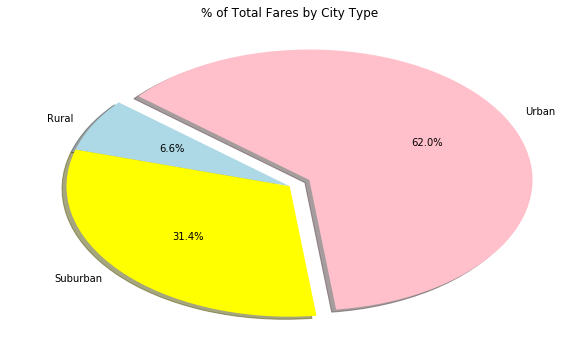

In [47]:
colors = ["lightblue", "yellow", "pink"]
explode= (0,0,0.1)
plt.figure(figsize=(10,6))
plt.pie(by_city_type['% of total fare'], explode=explode, labels=by_city_type['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

In [48]:
# Total Rides by City Type
ride_by_type = pyber_df.groupby(['type'], as_index=False)['ride_id'].sum()
ride_by_type

,type,ride_id
0,Rural,658729360193746
1,Suburban,3139583688401015
2,Urban,7890194186030600


In [49]:
total_ride = ride_by_type['ride_id'].sum()
total_ride

11688507234625361

In [50]:
ride_by_type['% of total rides'] = ride_by_type['ride_id']/total_ride
ride_by_type

,type,ride_id,% of total rides
0,Rural,658729360193746,0.056357
1,Suburban,3139583688401015,0.268604
2,Urban,7890194186030600,0.675039


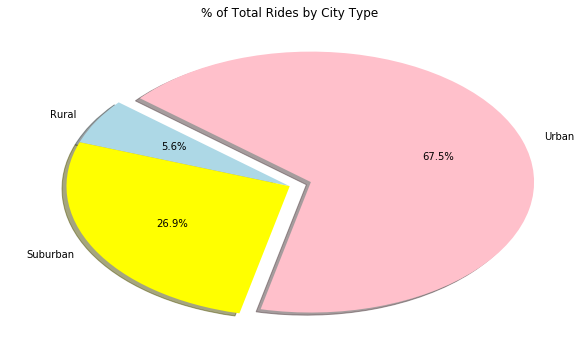

In [60]:
colors = ["lightblue", "yellow", "pink"]
explode= (0,0,0.1)
plt.figure(figsize=(10,6))
plt.pie(ride_by_type['% of total rides'], explode=explode, labels=ride_by_type['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()

In [52]:
# Total Drivers by city type

by_city_type = pyber_df.groupby(['type'], as_index=False)['driver_count'].sum()
by_city_type.head()

,type,driver_count
0,Rural,727
1,Suburban,9730
2,Urban,64501


In [53]:
by_city_type['total driver']=by_city_type['driver_count'].sum()
by_city_type

,type,driver_count,total driver
0,Rural,727,74958
1,Suburban,9730,74958
2,Urban,64501,74958


In [54]:
by_city_type['% of total driver']=by_city_type['driver_count']/by_city_type['total driver']
by_city_type

,type,driver_count,total driver,% of total driver
0,Rural,727,74958,0.009699
1,Suburban,9730,74958,0.129806
2,Urban,64501,74958,0.860495


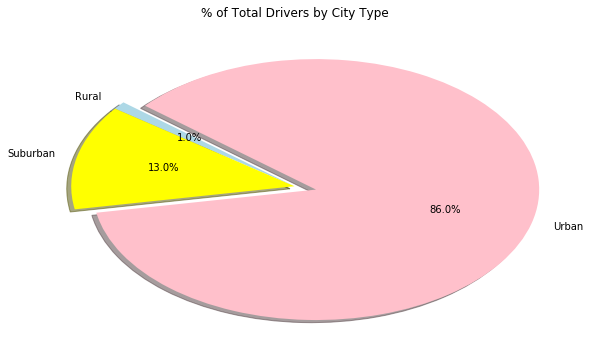

In [56]:
colors = ["lightblue", "yellow", "pink"]
explode= (0,0,0.1)
plt.figure(figsize=(10,6))
plt.pie(by_city_type['% of total driver'], explode=explode, labels=by_city_type['type'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()